In [15]:
import csv

txt_file = r"sept_temp.txt"
csv_file = r"septembercsv.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

            aravali_241  aravali_25  aravali_244  aravali_243  aravali_234  \
TS                                                                           
2016-09-01     4.900177    3.567896     4.824875     6.925271     6.996667   
2016-09-02     4.540667    3.709146     5.244250     3.634917     6.822646   
2016-09-03     5.022698    4.359312     4.853333     2.598385     7.170667   
2016-09-04     5.018094    3.085812     5.116062     3.696802     7.582708   
2016-09-05     4.398698    3.774104     4.726500     5.746979     7.516896   
2016-09-06     4.780292    4.201229     4.439396     7.049646     7.304771   
2016-09-07     4.732104    3.732687     4.834458     7.092052     7.509688   
2016-09-08     3.101146    2.378979     3.561083     4.035552     4.609063   
2016-09-09          NaN         NaN          NaN          NaN          NaN   
2016-09-10          NaN         NaN          NaN          NaN          NaN   
2016-09-11     4.682319    3.461250     6.198444     5.568486   

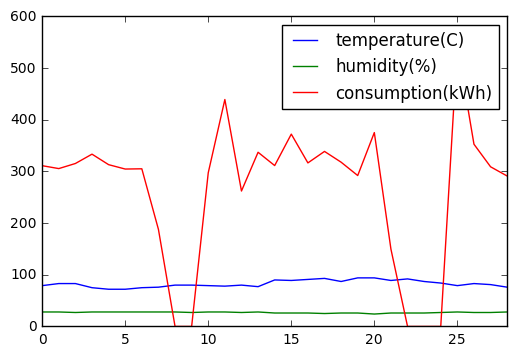

In [2]:
import pandas as pd
import os
import numpy as np
import datetime

from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pymongo import MongoClient


client=MongoClient('127.0.0.1:27017')
db=client.test4
DF = pd.DataFrame()
for flat_name in db.collection_names():
    if flat_name[:7] == 'aravali' and flat_name[-3:] == 'Sep' :
        flat = db[flat_name]
#         print(flat_name)
    else:
        continue
    tdf = np.abs(pd.DataFrame(list(flat.find({},{'_id':0,'TS':1,'con':1}))))
#     print(tdf)
    tdf = tdf.set_index(['TS'])
    tdf.index = pd.to_datetime(tdf.index, unit='s')
    tdf = tdf['con'].resample('D').mean()
#     print(tdf)
    DF[flat_name[:-3]] = (tdf.shift(-1) - tdf)/1000
#     print(DF[flat_name[:-3]])
pd.set_option('display.max_rows', len(DF))
pd.set_option('display.max_columns', None)
del DF['aravali_3']
del DF['aravali_208']
# del DF['aravali_230']
del DF['aravali_11']
# del DF['aravali_239']
del DF['aravali_22']
# del DF['aravali_2']
del DF['aravali_10']
# # del DF['aravali_223']
# del DF['aravali_224']


DF=DF.drop(DF.index[[0]])
DF=DF.drop(DF.index[[29]])

   
print(DF)

DF.round(2)
sumcon = DF.sum(axis=1)  


# print(DF) 

# plt.plot(sumcon)

temp = pd.read_csv('septembercsv.csv')
temp = temp.drop(temp.index[[29]])
print(temp)
sc = list(sumcon)

temp['con'] = sc
print("max = ", max(sc) , min(list(filter((0.0).__ne__, sc))))
temp.columns = ['temperature(C)', 'humidity(%)','consumption(kWh)']
temp.plot()
# plt.show()
plt.savefig('Sep.png')
temp.corr().to_csv("September.csv")
temp.to_csv('september.csv')
print(temp.corr())
# sumcon['temp'] = temp['tempavg']
# sumcon['humid'] = temp['humidavg']

print(temp)